In [ ]:
import pandas as pd

datos = pd.read_csv('train.csv')


In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

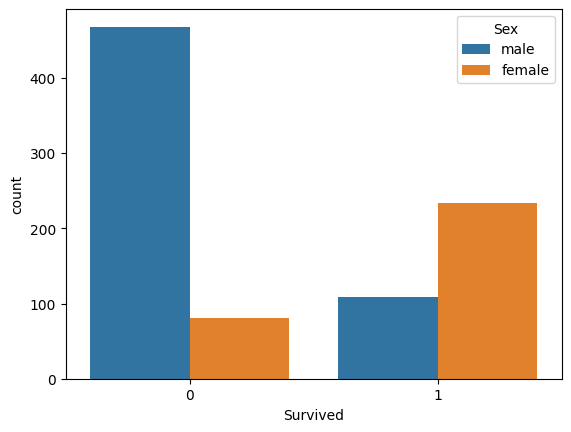

In [ ]:
import seaborn as sb

# determinar la importancia del genero en la supervivencia

sb.countplot(x='Survived', data=datos, hue='Sex')


In [ ]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
datos['Age'].mean() # promedio de edad

29.69911764705882

In [ ]:

edad_prom_clase1 = datos[ datos['Pclass'] == 1 ]['Age'].mean()
edad_prom_clase2 = datos[ datos['Pclass'] == 2 ]['Age'].mean()
edad_prom_clase3 = datos[ datos['Pclass'] == 3 ]['Age'].mean()


In [ ]:
# datos[ datos['Pclass'] == 1 ]['Age'].fillna(edad_prom_clase1)

condicion = datos['Pclass'] == 1

datos.loc[ condicion ,'Age'] = datos.loc[ condicion ,'Age'].fillna(edad_prom_clase1)

In [ ]:
# Rellenando las edades de la clase 2 y 3
condicion = datos['Pclass'] == 2
datos.loc[ condicion ,'Age'] = datos.loc[ condicion ,'Age'].fillna(edad_prom_clase2)

condicion = datos['Pclass'] == 3
datos.loc[ condicion ,'Age'] = datos.loc[ condicion ,'Age'].fillna(edad_prom_clase3)

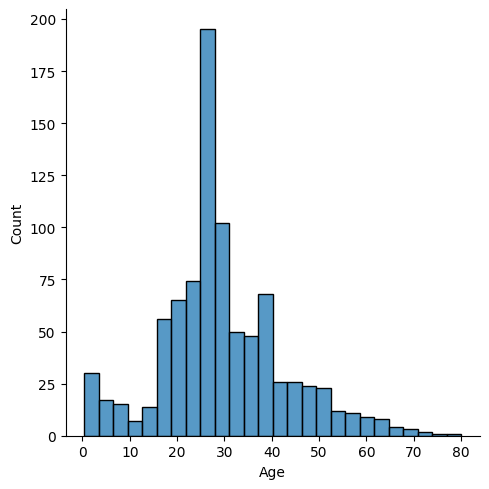

In [ ]:
sb.displot(x='Age', data=datos)

In [ ]:
#eliminar los datos de la cabina

datos = datos.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)

In [ ]:
datos.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
datos = datos.dropna()

In [ ]:
#obtener dummies de la comuna "Sex"

sex_dummies = pd.get_dummies(datos['Sex'], drop_first=True)

In [ ]:
# hago la union con los dummies
datos = datos.join(sex_dummies)

# Elimino la columna de 'Sex'
datos = datos.drop(['Sex'], axis=1)

In [ ]:
datos['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

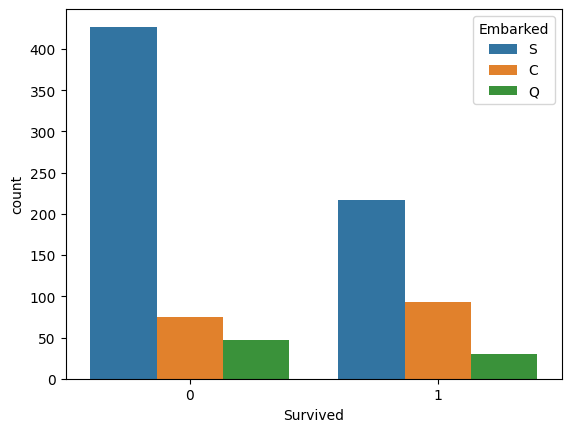

In [ ]:
sb.countplot(x='Survived', data = datos, hue='Embarked')

In [ ]:
#obtener los dummies de 'Embarked'

embarked_dummies = pd.get_dummies(datos['Embarked'], drop_first=True)

In [ ]:
datos = datos.join(embarked_dummies)

In [ ]:
datos = datos.drop(['Embarked'], axis = 1)

<Axes: >

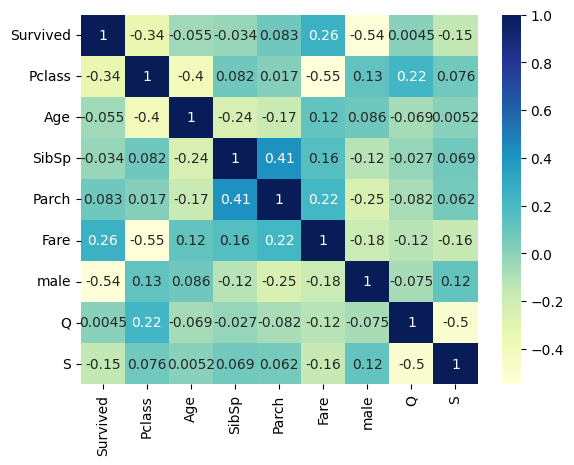

In [ ]:
sb.heatmap(data=datos.corr(), annot=True, cmap='YlGnBu')

In [ ]:
datos.corr()['Survived']

Survived    1.000000
Pclass     -0.335549
Age        -0.055278
SibSp      -0.034040
Parch       0.083151
Fare        0.255290
male       -0.541585
Q           0.004536
S          -0.151777
Name: Survived, dtype: float64

In [ ]:
# Entrenamiento de nuestro modelo
X = datos.drop(['Survived'], axis=1)
y = datos['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth = 5) # un nivel de profundiad

modelo.fit(X_train,y_train)

predicciones = modelo.predict(X_test)

In [ ]:
# resultados con el modelo de arbol de decision

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicciones)

0.8539325842696629

In [ ]:
# buscar un maximo considerable

for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth = i) # un nivel de profundiad
  modelo.fit(X_train,y_train)
  predicciones = modelo.predict(X_test)
  resultado = accuracy_score(y_test, predicciones)
  print(f"para {i} el resultado fue: {resultado}")

In [ ]:
#graficar el modelo para ver la relacion entre las caracteristicas
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    modelo,
    feature_names = X_train.columns,
    class_names= [ "Murió", "Vivió" ],
    filled=True, label="None"
)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicciones)

0.7528089887640449

In [ ]:
from sklearn.metrics import confusion_matrix


resultados = pd.DataFrame(confusion_matrix(y_test, predicciones), columns=['Pred. No:', 'Pred. Si:'], index=["Real No:", "Real Si:"])

resultados


,Pred. No:,Pred. Si:
Real No:,108,8
Real Si:,18,44
